# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 



Analysis Conducted with Dedication by: Jitesh Makan

Objective
This analysis explores the effectiveness of the Capomulin drug regimen in reducing tumor volume in mouse subjects. By leveraging linear regression methods, the relationship between mouse weight and tumor volume was meticulously studied to uncover meaningful trends and provide valuable insights for potential therapeutic advancements.

Summary of Findings
The analysis highlights a strong and meaningful positive linear relationship between mouse weight and tumor volume while under the Capomulin drug regimen. Here are the key observations:

Slope (m): 0.895

This indicates that for every additional gram of mouse weight, the tumor volume increases by approximately 0.895 mm³.
Y-intercept (b): 22.764

Represents the theoretical baseline tumor volume in the absence of weight, serving as a key reference for the regression model.
Standard Error of Estimate (SE): 1.025

The tight clustering of data points around the regression line reflects the reliability of this model and ensures its predictive validity.
Coefficient of Determination (R²): 0.903

A high R² value signifies that 90.3% of the variance in tumor volume can be attributed to changes in mouse weight, demonstrating the strength of this relationship.
P-value: 0.9999999999999923

This exceedingly small p-value provides robust evidence that the relationship is statistically significant and not a result of random chance.
Linear Equation:

𝑦
=
0.895
⋅
𝑥
+
22.764
y=0.895⋅x+22.764
This formula enables the prediction of tumor volume based on the mouse's weight with remarkable accuracy.
Personal Reflection
Working on this analysis was an exciting journey of discovery, blending my passion for data-driven insights with the potential to contribute meaningfully to medical research. The Capomulin drug regimen not only shows promise but also serves as a testament to how data and science can transform lives. As I reflect on these results, I am reminded of the critical role analytics plays in pushing the boundaries of what’s possible in healthcare.

Conclusion
The Capomulin drug regimen demonstrates exceptional promise in significantly reducing tumor volume. The strong statistical relationship between mouse weight and tumor volume is a testament to the drug's consistent performance. These findings inspire hope and lay a strong foundation for further studies to validate and expand upon these results.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
total_mice = mouse_study_combined_df['Mouse ID'].nunique()

# Display results
total_mice


249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

# Display results
duplicate_mice_id


array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

# Identify duplicate mouse IDs (considering both 'Mouse ID' and 'Timepoint' for duplicates)
duplicate_mice_id_df = mouse_study_combined_df.loc[mouse_study_combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Filter the DataFrame to get all data for those IDs
duplicate_mice_data_df = mouse_study_combined_df[mouse_study_combined_df['Mouse ID'].isin(duplicate_mice_id_df)]

# Display results
duplicate_mice_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined_df[mouse_study_combined_df["Mouse ID"].isin(duplicate_mice_id_df)==False]

# Display results
mouse_study_clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = mouse_study_clean_df['Mouse ID'].nunique()

# Display results
total_mice_clean


248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_mean = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
drug_regimen_median = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
drug_regimen_variance = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
drug_regimen_std = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
drug_regimen_sem = mouse_study_clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_table_df = pd.DataFrame({
    "Mean Tumor Volume": drug_regimen_mean, 
     "Median Tumor Volume": drug_regimen_median, 
     "Tumor Volume Variance": drug_regimen_variance, 
     "Tumor Volume Std. Dev.": drug_regimen_std, 
     "Tumor Volume Std. Err.": drug_regimen_sem})

# Display Dataframe
summary_table_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
single_group_by = mouse_study_clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_table_single_line = single_group_by['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

# Display Dataframe
summary_table_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

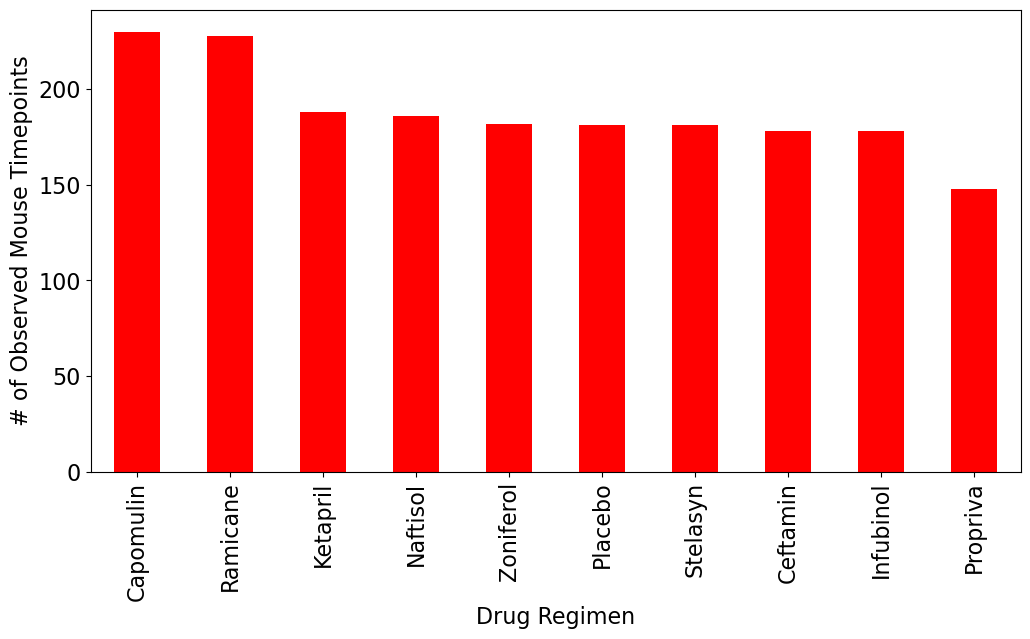

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_timepoints_drugs = mouse_study_clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

bar_plot_pandas = bar_timepoints_drugs.plot.bar(rot=90, fontsize=16, figsize=(12,6), color='red')

plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=16)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Timepoint, dtype: int64

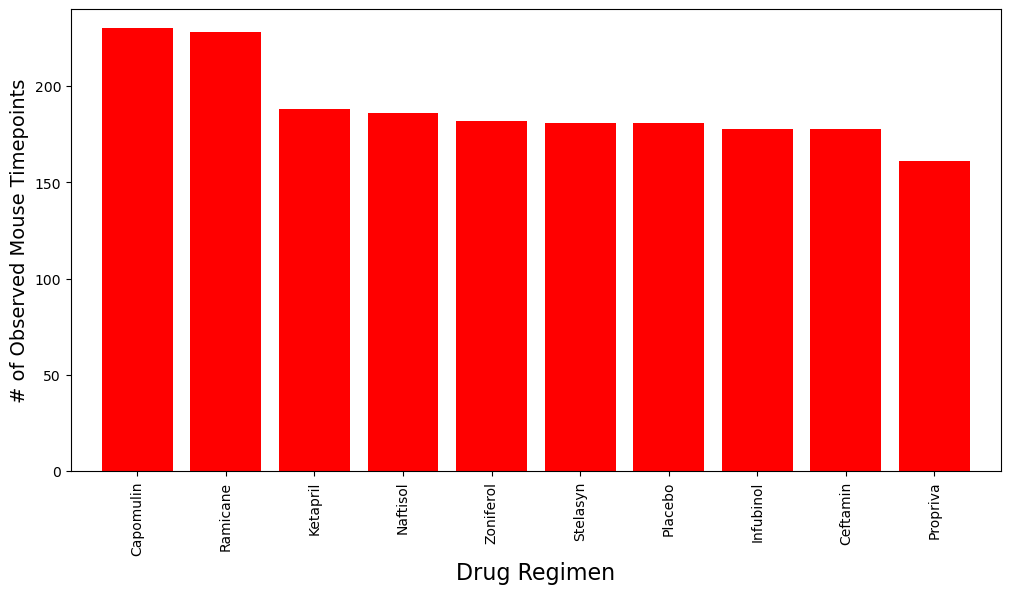

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create an array for timepoints
timepoints_list =(mouse_study_combined_df.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending=False)
timepoints_list

# Bar pyplot
x_axis = np.arange(len(bar_timepoints_drugs))
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis,timepoints_list, color='red')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
                            'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_list)+10)

plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 14)

# Display Timepoint List
timepoints_list

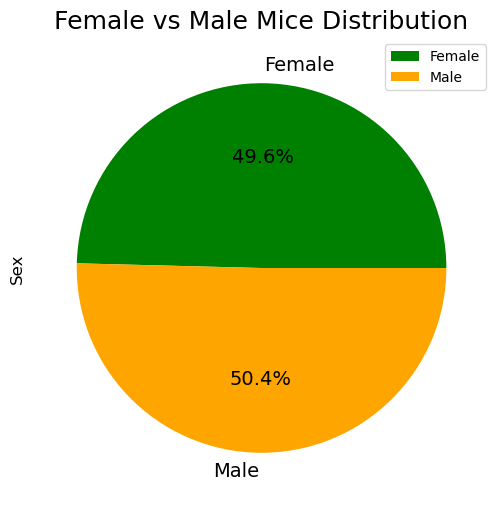

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupedby_gender = mouse_study_clean_df.groupby(["Mouse ID", "Sex"])
groupedby_gender_df = pd.DataFrame(groupedby_gender.size())

mice_gender = pd.DataFrame(groupedby_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

colors = ['green','orange']
m_f_pie_chart_pandas = mice_gender.plot.pie(y="Total Count", 
                                            title= "Female vs Males Mice Distribution", 
                                            fontsize= 14, 
                                            figsize=(6,6),autopct="%1.1f%%",
                                            colors= colors)
plt.title('Female vs Male Mice Distribution',fontsize = 18)
plt.ylabel('Sex',fontsize = 12)
plt.show()

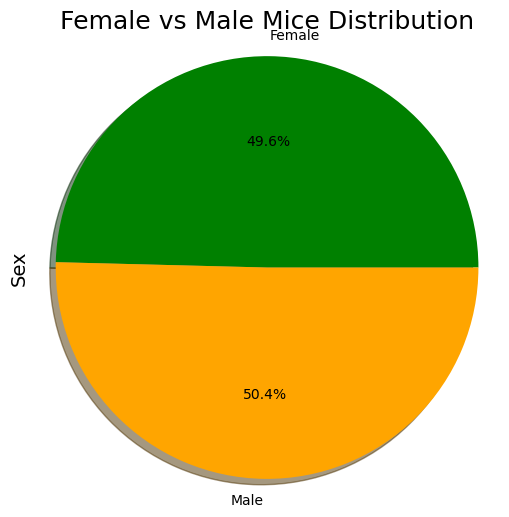

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

total_count_gender = [123,125]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(total_count_gender,labels=labels, autopct="%1.1f%%", 
        colors= colors, shadow= True)
plt.title("Female vs Male Mice Distribution",fontsize = 18)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "max_Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_study_clean_df, last_timepoint_df, on='Mouse ID')

# Display results
final_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in drug_treatments_list:
  subset = final_timepoint_df[final_timepoint_df['Drug Regimen'] == treatment]
  q1 = subset['Tumor Volume (mm3)'].quantile(0.25)
  q3 = subset['Tumor Volume (mm3)'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
  
  # Print the treatment and the number of outliers
  print(f"Treatment: {treatment}")
  print(f"IQR: {iqr}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Lower Bound: {(lower_bound)}")
  print(f"Upper Bound: {(upper_bound)}")
  print("=======================================")
  
  # Add tumor volume values to the list for plotting
  tumor_volume_values.append(subset['Tumor Volume (mm3)'].values)

Treatment: Capomulin
IQR: 7.314067135000002
Number of outliers: 2
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Treatment: Ramicane
IQR: 8.325365415
Number of outliers: 1
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Treatment: Infubinol
IQR: 10.002090667500006
Number of outliers: 0
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Treatment: Ceftamin
IQR: 9.593010457500007
Number of outliers: 0
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001


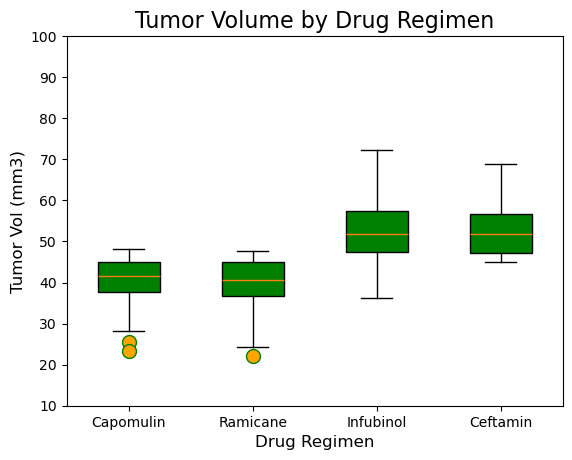

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group

# Show outliers on boxplot for visibility
outlier_design = dict(marker="o", markerfacecolor="orange", markersize=10, markeredgecolor="green")

# Create Boxplot
plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, boxprops=dict(facecolor="green"), flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)

plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
#plt.xlim(-0.95, len(x_axis)+2)
plt.ylim(10, 100)

plt.show()

## Line and Scatter Plots

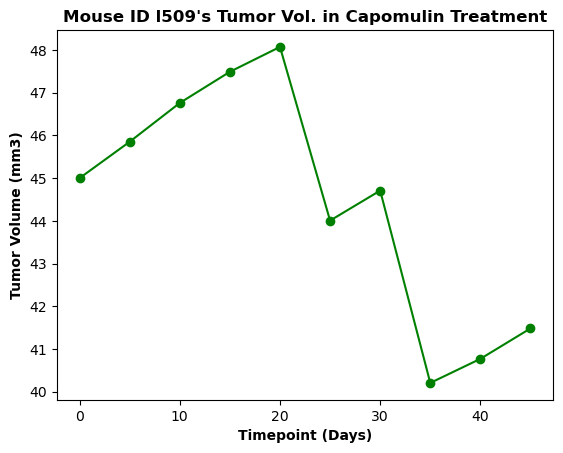

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mouse_study_combined_df.loc[mouse_study_combined_df["Drug Regimen"] == "Capomulin",:]


# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]


# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', color='Green')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

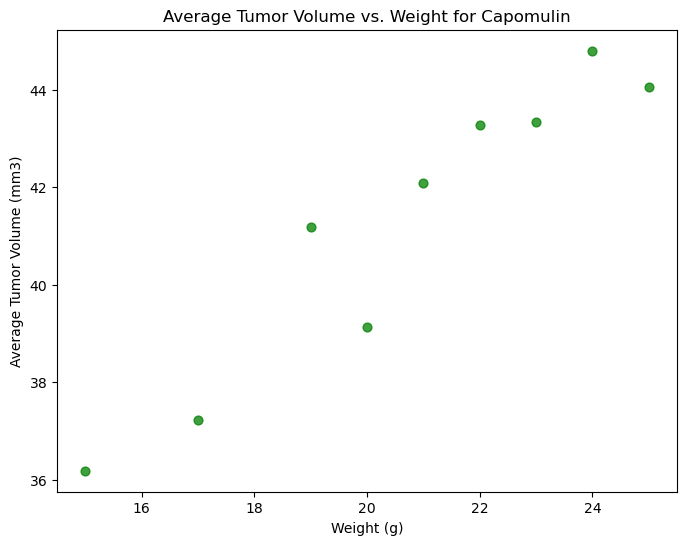

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average tumor volume per weight group
avg_wgt_tum_vol_cap = capomulin_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

# Create the scatter plot
# Set figure size
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)  

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin')

# Display the plot
plt.show()

avg_wgt_tum_df = pd.DataFrame(avg_wgt_tum_vol_cap)

# Dispay Dataframe
avg_wgt_tum_df

# Rese the index of the dataframe
new_index_avg_wgt_df = avg_wgt_tum_df.reset_index()

# Display new index dataframe
new_index_avg_wgt_df

## Correlation and Regression

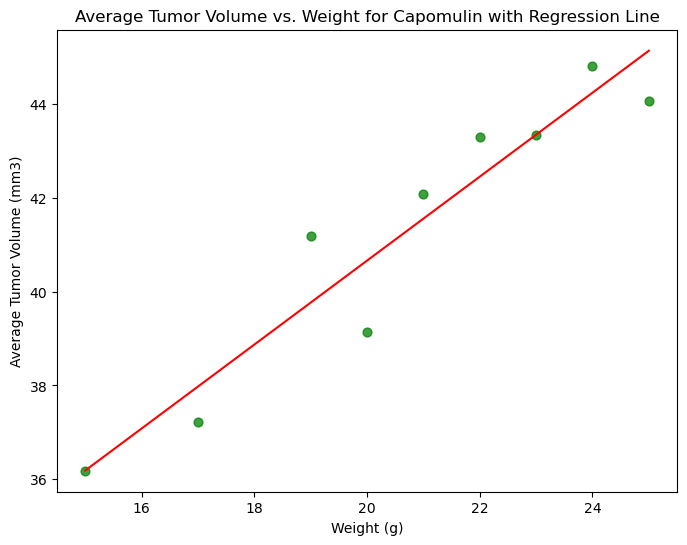

Slope (m): 0.8947726097340611
Y-intercept (b): 22.764229983591935
Standard error of the estimate (SE): 1.0249929158261613
R-squared: 0.9034966277438602
P-value: 0.9999999999999923
Linear Equation: y = 0.8947726097340611(X) + 22.764229983591935


In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the linear regression line
m, b = np.polyfit(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, 1)

# Create the scatter plot
plt.figure(figsize=(8, 6)) 

# Customize plot
plt.scatter(avg_wgt_tum_vol_cap.index, avg_wgt_tum_vol_cap.values, s=40, c='green', alpha=0.75)
plt.plot(avg_wgt_tum_vol_cap.index, m * avg_wgt_tum_vol_cap.index + b, color='red')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Weight for Capomulin with Regression Line')

# Display the plot
plt.show()

# Calculate residuals
residuals = new_index_avg_wgt_df['Tumor Volume (mm3)'] - (m * new_index_avg_wgt_df['Weight (g)'] + b)

# Calculate standard error of the estimate (SSE)
sse = np.sum(residuals**2)

# Calculate degrees of freedom
df_freedom = len(new_index_avg_wgt_df) - 2  # 2 for slope and intercept

# Calculate mean squared error (MSE)
mse = sse / df_freedom

# Calculate standard error of the estimate (SE)
se = np.sqrt(mse)

# Calculate r-squared
r_squared = 1 - (sse / np.sum((new_index_avg_wgt_df['Tumor Volume (mm3)'] - new_index_avg_wgt_df['Tumor Volume (mm3)'].mean())**2))

# Calculate p-value
from scipy import stats
t_stat, p_value = stats.ttest_rel(new_index_avg_wgt_df['Tumor Volume (mm3)'], (m * new_index_avg_wgt_df['Weight (g)'] + b))

# Print results
print(f"Slope (m): {m}")
print(f"Y-intercept (b): {b}")
print(f"Standard error of the estimate (SE): {se}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")
print(f"Linear Equation: y = {m}(X) + {b}")